<a href="https://colab.research.google.com/github/snlynnoo/customer-segamentation-banking/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Customer Segmentaion 

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sklearn
import warnings

# Set max row and col for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 100)

# Supress warnings
warnings.filterwarnings('ignore')

### Data Exploration

In [ ]:
# Import dataset
df = pd.read_csv('/content/drive/MyDrive/bank_transactions.csv')
df.shape

(1048567, 9)

In [ ]:
# View dataset
df.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


In [ ]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [ ]:
# Custom Function to generate descriptive statics
def describe_custom(df):
    desc = df.describe()
    skewness = df.skew()
    median = df.median()
    mode = df.mode()
    desc.loc['skewness'] = skewness
    desc.loc['median'] = median
    desc.loc['mode'] = mode.iloc[0]
    return desc

In [ ]:
describe_custom(df).T

,count,mean,std,min,25%,50%,75%,max,skewness,median,mode
CustAccountBalance,1046198.00,115403.54,846485.38,0.00,4721.76,16792.18,57657.36,115035495.10,60.53,16792.18,0.00
TransactionTime,1048567.00,157087.53,51261.85,0.00,124030.00,164226.00,200010.00,235959.00,-0.84,164226.00,193303.00
TransactionAmount (INR),1048567.00,1574.34,6574.74,0.00,161.00,459.03,1200.00,1560034.99,47.34,459.03,100.00


In [ ]:
# Check missing values
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [ ]:
# Calculate percentage of missing values
missing_values = df.isnull().sum()
percent_missing = round((missing_values / len(df)) * 100, 2)
print(percent_missing)

TransactionID             0.00
CustomerID                0.00
CustomerDOB               0.32
CustGender                0.10
CustLocation              0.01
CustAccountBalance        0.23
TransactionDate           0.00
TransactionTime           0.00
TransactionAmount (INR)   0.00
dtype: float64


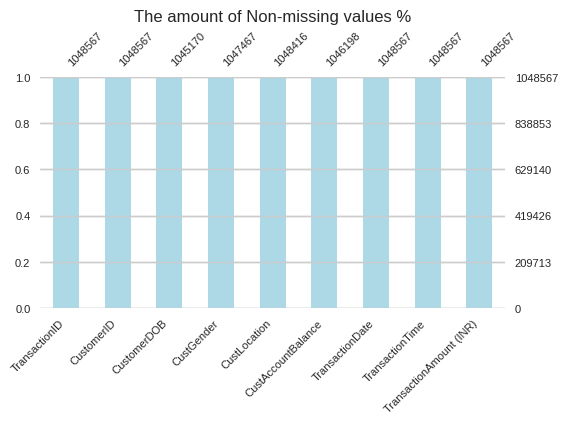

In [ ]:
# Plot non-missing value %
msno.bar(df, color = "lightblue", figsize = (6,3), fontsize = 8)
plt.title("The amount of Non-missing values %", fontsize = 12)
plt.show()

⏭

In [ ]:
# delete missing data
df1 = df.dropna()

In [ ]:
print('Original dataframe', df.shape)
print('New dataframe', df1.shape)

Original dataframe (1048567, 9)
New dataframe (1041614, 9)


In [ ]:
# check for duplicates
df1[df.duplicated() == True ].count()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

⏭

In [ ]:
# convert type of columns TransactionDate, CustomerDOB from string to datetime
df1['TransactionDate'] = pd.to_datetime(df1['TransactionDate'])
df1['CustomerDOB'] = pd.to_datetime(df1['CustomerDOB'])
df1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.00
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.00
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.00
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.00
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.50


In [ ]:
# Verify data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 79.5+ MB


In [ ]:
# List transactions date 
df1['TransactionDate'].value_counts().sort_index()

2016-01-08    20277
2016-01-09    22179
2016-02-08    20787
2016-02-09    22718
2016-03-08    20446
2016-03-09    26292
2016-04-08    20535
2016-04-09    26420
2016-05-08    20949
2016-05-09    21116
2016-06-08    26416
2016-06-09    19510
2016-07-08    27084
2016-07-09    20999
2016-08-08    20883
2016-08-09    21648
2016-08-13    26738
2016-08-14    25407
2016-08-15    24020
2016-08-16    20278
2016-08-17    20960
2016-08-18    19338
2016-08-19    18559
2016-08-20    21188
2016-08-21    22833
2016-08-22    18441
2016-08-23    17239
2016-08-24    17893
2016-08-25    18424
2016-08-26    17615
2016-08-27    21349
2016-08-28    20944
2016-08-29    16700
2016-08-30    17273
2016-08-31    19586
2016-09-08    21673
2016-09-09    21444
2016-09-13    20506
2016-09-14    19845
2016-09-15    19610
2016-09-18    14622
2016-09-22     6925
2016-09-23     3460
2016-09-25     8127
2016-09-26    12376
2016-09-27     7401
2016-09-30     1935
2016-10-08    21457
2016-10-09    25628
2016-10-16        3


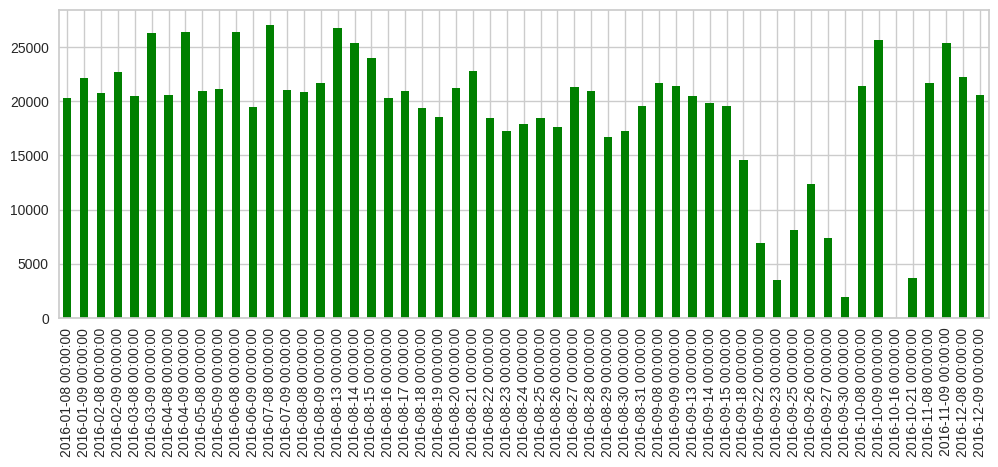

In [ ]:
# Plot date distribution 
df1['TransactionDate'].value_counts().sort_index().plot(kind='bar', figsize = (12,4), fontsize = 10, color = 'green')
plt.show()

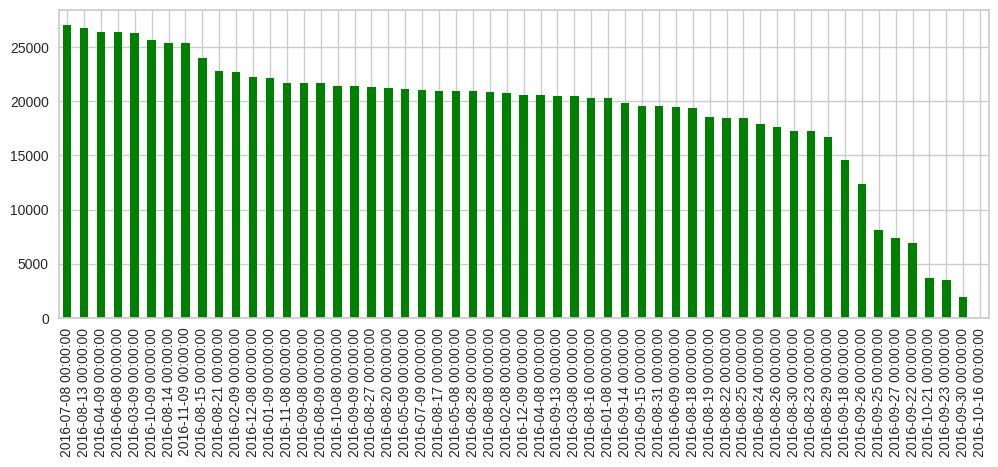

In [ ]:
# Plot hightest transaction volume by day
df1['TransactionDate'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize = (12,4), fontsize = 10, color = 'green')
plt.show()

All the transactions took place are within a year of 2016 starting from Jan to Dec

In [ ]:
df1['CustomerDOB'].value_counts()

1800-01-01    56292
1989-01-01      809
1990-01-01      784
1991-06-08      698
1991-01-01      665
              ...  
2051-02-12        1
2052-03-20        1
2047-09-26        1
2041-04-10        1
2044-10-24        1
Name: CustomerDOB, Length: 17233, dtype: int64

In [ ]:
filtered_df = df1.loc[df1['CustomerDOB'].dt.year >= 2006]
filtered_df['CustomerDOB'].value_counts()

2054-12-28    214
2069-01-01    180
2071-01-06    170
2070-01-12    150
2072-01-11    140
             ... 
2061-04-29      1
2043-03-12      1
2053-07-30      1
2012-02-18      1
2044-10-24      1
Name: CustomerDOB, Length: 7603, dtype: int64

There are exceptionally high number of customers with DOB as 1800-01-01 as compared to the rest, this is probably the default value. A customer being born in 1800 would mean he/she will be 216 years old in 2016, which doesnt make sense, hence these data will be deleted.

Also, any DOB later than 2006 will be removed since in India, the legal age to have a bank account is 10yo. 

⏭

In [ ]:
# Remove data for DOB = 1800-01-01 or DOB >2006
df1 = df1.drop(df1[(df1['CustomerDOB'] == '1800-01-01') | (df1['CustomerDOB'].dt.year >= 2006)].index)

In [ ]:
df1['CustomerDOB'].value_counts().sort_index()

1973-01-01    83
1973-01-02    32
1973-01-03    49
1973-01-04    18
1973-01-05    48
              ..
2005-09-25     1
2005-09-27     3
2005-10-16     4
2005-10-27     3
2005-11-07     1
Name: CustomerDOB, Length: 9629, dtype: int64

In [ ]:
df1.shape

(901140, 9)

⏭

In [ ]:
#Calculate customer age:
df1['CustomerAge'] =df1['TransactionDate'].dt.year - df1['CustomerDOB'].dt.year
df1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.00,22
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.00,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.00,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.50,28
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.00,24


In [ ]:
# list customers age
df1['CustomerAge'].value_counts().sort_index()

11       30
12       75
13       69
14       98
15      142
16      269
17      688
18     1936
19     7155
20    12480
21    20704
22    36179
23    53142
24    66484
25    71185
26    72616
27    69156
28    62905
29    58606
30    52897
31    46096
32    41105
33    35701
34    32364
35    27369
36    25122
37    22126
38    19605
39    16626
40    15057
41    12293
42    10952
43     9908
Name: CustomerAge, dtype: int64

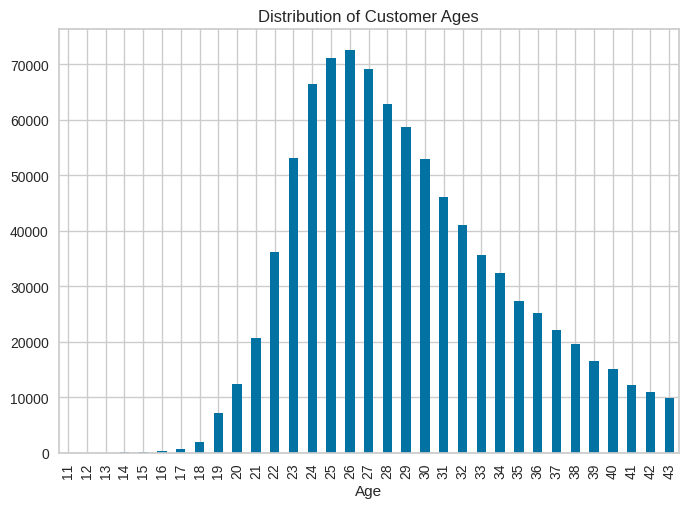

In [ ]:
# Plotting Age distribution 
df1['CustomerAge'].value_counts().sort_index().plot(kind='bar', fontsize = 10)
plt.xlabel('Age')
plt.title('Distribution of Customer Ages')
plt.show()

In [ ]:
# List gender
df1.CustGender.value_counts()

M    651768
F    249372
Name: CustGender, dtype: int64

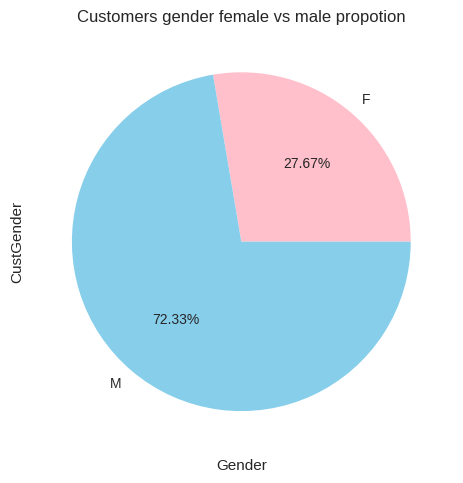

In [ ]:
# Plot customers gender 
df1['CustGender'].value_counts().sort_values().plot(kind='pie', colors = ['pink','skyblue'],autopct='%1.2f%%',fontsize = 10)
plt.xlabel('Gender')
plt.title('Customers gender female vs male propotion')
plt.show()

#### Outliers detection

In [ ]:
# # Outlier detection using Z-score method
# from scipy import stats

# # Calculate the Z-score for the entire dataframe
# z_scores = stats.zscore(df1)

# # Identify outliers using a Z-score threshold of 3
# outliers = df1.where(np.abs(z_scores) > 3)

# # Print the outliers
# print("Outliers: ", outliers.dropna())

In [ ]:
# # Outlier detection using box-plot
# for col in df1.columns:
#     fig, ax = plt.subplots(figsize=(4, 4))
#     sns.boxplot(data=df1[col], ax=ax, color = 'lightskyblue')
#     ax.set_title('Box plot of ' + col)
#     plt.show()

### Feature Engineering

**Feature engineering - RFM Scores**




*   Recency: Number of days since the last purchase or order
*   Frequency: Number of transactions made
*   Monetary: Total amount spent



In [ ]:
# calculate the minimum (first transaction)
df1['TransactionDate1']=df1['TransactionDate'] 
# calculate the maximum (last transaction)
df1['TransactionDate2']=df1['TransactionDate'] 
df1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,TransactionDate1,TransactionDate2
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.00,22,2016-02-08,2016-02-08
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.00,20,2016-02-08,2016-02-08
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.00,43,2016-02-08,2016-02-08
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.50,28,2016-02-08,2016-02-08
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.00,24,2016-02-08,2016-02-08


In [ ]:
df1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,TransactionDate1,TransactionDate2
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.00,22,2016-02-08,2016-02-08
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.00,20,2016-02-08,2016-02-08
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.00,43,2016-02-08,2016-02-08
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.50,28,2016-02-08,2016-02-08
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.00,24,2016-02-08,2016-02-08


⏭

In [ ]:
RFM_df = df1.groupby("CustomerID").agg({
                                        "TransactionID" : "count",
                                        "CustGender" : "first",
                                        "CustLocation":"first",
                                        "CustAccountBalance"  : "mean",
                                        "TransactionAmount (INR)" : "sum",
                                        "CustomerAge" : "median",
                                        "TransactionDate2":"max",
                                        "TransactionDate1":"min",
                                        "TransactionDate":"median"
                        })
RFM_df = RFM_df.reset_index()
RFM_df

,CustomerID,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate2,TransactionDate1,TransactionDate
0,C1010011,2,F,NOIDA,76340.63,5106.00,28.50,2016-09-26,2016-09-08,2016-09-17
1,C1010012,1,M,MUMBAI,24204.49,1499.00,22.00,2016-08-14,2016-08-14,2016-08-14
2,C1010014,2,F,MUMBAI,100112.95,1455.00,28.00,2016-07-08,2016-01-08,2016-04-08
3,C1010018,1,F,CHAMPARAN,496.18,30.00,26.00,2016-09-15,2016-09-15,2016-09-15
4,C1010028,1,F,DELHI,296828.37,557.00,28.00,2016-08-29,2016-08-29,2016-08-29
...,...,...,...,...,...,...,...,...,...,...
777351,C9099836,1,M,BHIWANDI,133067.23,691.00,26.00,2016-07-08,2016-07-08,2016-07-08
777352,C9099877,1,M,BANGALORE,96063.46,222.00,20.00,2016-09-15,2016-09-15,2016-09-15
777353,C9099919,1,M,GUNTUR,5559.75,126.00,23.00,2016-08-18,2016-08-18,2016-08-18
777354,C9099941,1,M,CHENNAI,35295.92,50.00,21.00,2016-08-28,2016-08-28,2016-08-28


⏭

In [ ]:
#confirm customer ID is unique
RFM_df[RFM_df.duplicated() == True].count()

CustomerID                 0
TransactionID              0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionAmount (INR)    0
CustomerAge                0
TransactionDate2           0
TransactionDate1           0
TransactionDate            0
dtype: int64

⏭

In [ ]:
RFM_df['Recency'] = (RFM_df['TransactionDate2'] - RFM_df['TransactionDate1']).dt.days
RFM_df.head()

,CustomerID,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate2,TransactionDate1,TransactionDate,Recency
0,C1010011,2,F,NOIDA,76340.63,5106.00,28.50,2016-09-26,2016-09-08,2016-09-17,18
1,C1010012,1,M,MUMBAI,24204.49,1499.00,22.00,2016-08-14,2016-08-14,2016-08-14,0
2,C1010014,2,F,MUMBAI,100112.95,1455.00,28.00,2016-07-08,2016-01-08,2016-04-08,182
3,C1010018,1,F,CHAMPARAN,496.18,30.00,26.00,2016-09-15,2016-09-15,2016-09-15,0
4,C1010028,1,F,DELHI,296828.37,557.00,28.00,2016-08-29,2016-08-29,2016-08-29,0


In [ ]:
RFM_df.Recency.value_counts()

0      669064
1        2677
31       2033
30       1994
61       1726
        ...  
287        15
58         12
265        10
266         7
206         5
Name: Recency, Length: 252, dtype: int64

Since zeor day means the most recent day, they are all replace with 1.

In [ ]:
RFM_df['Recency'] = RFM_df['Recency'].apply(lambda x: 1 if x==0 else x)
RFM_df.Recency.value_counts()

1      671741
31       2033
30       1994
61       1726
5        1472
        ...  
287        15
58         12
265        10
266         7
206         5
Name: Recency, Length: 251, dtype: int64

⏭

In [ ]:
# perform one-hot encoding on the CustGender variable
RFM_df = pd.get_dummies(RFM_df, columns=['CustGender'])

In [ ]:
RFM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777356 entries, 0 to 777355
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CustomerID               777356 non-null  object        
 1   TransactionID            777356 non-null  int64         
 2   CustLocation             777356 non-null  object        
 3   CustAccountBalance       777356 non-null  float64       
 4   TransactionAmount (INR)  777356 non-null  float64       
 5   CustomerAge              777356 non-null  float64       
 6   TransactionDate2         777356 non-null  datetime64[ns]
 7   TransactionDate1         777356 non-null  datetime64[ns]
 8   TransactionDate          777356 non-null  datetime64[ns]
 9   Recency                  777356 non-null  int64         
 10  CustGender_F             777356 non-null  uint8         
 11  CustGender_M             777356 non-null  uint8         
dtypes: datetime64[ns

In [ ]:
# Rename Columns
RFM_df.rename(columns={"TransactionID":"Frequency"},inplace=True)
RFM_df.rename(columns={"TransactionAmount (INR)":"Monetary"},inplace=True)

#### EDA after FE

In [ ]:
RFM_df.CustLocation.value_counts()

MUMBAI                          76971
BANGALORE                       62418
NEW DELHI                       58363
GURGAON                         55893
DELHI                           53224
                                ...  
THANI                               1
TIRUMALGERRY SECUNDERADAD           1
CHANDRASEKHARPUR BHUBANESWAR        1
SCHOOL MOHANPUR                     1
13 GORAKHPUR                        1
Name: CustLocation, Length: 7407, dtype: int64

In [ ]:
# Create dataframe for clustering
RFM_df_final = RFM_df.drop(columns=["CustomerID","TransactionDate2","TransactionDate1","TransactionDate","CustLocation"])
RFM_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777356 entries, 0 to 777355
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Frequency           777356 non-null  int64  
 1   CustAccountBalance  777356 non-null  float64
 2   Monetary            777356 non-null  float64
 3   CustomerAge         777356 non-null  float64
 4   Recency             777356 non-null  int64  
 5   CustGender_F        777356 non-null  uint8  
 6   CustGender_M        777356 non-null  uint8  
dtypes: float64(3), int64(2), uint8(2)
memory usage: 31.1 MB


In [ ]:
# plt.style.use("fivethirtyeight")
# plt.figure(figsize=(7,7))
# chart=sns.countplot(y='CustLocation',data=EDA_df,palette='rocket', order = EDA_df['CustLocation'].value_counts()[:30].index)
# plt.title("Top 30 Location of Customer ",
#           fontsize='20',
#           backgroundcolor='AliceBlue',
#           color='blue');

In [ ]:
# correlations = RFM_df_final.corr()
# mask = np.triu(np.ones_like(correlations, dtype=bool))
# f, ax = plt.subplots(figsize = (5, 5))
# sns.heatmap(correlations, mask=mask, annot = True, cmap='PiYG', center = 0, fmt = '.1f', square = True)

### Feature Scaling 

In [ ]:
# Sample 0.02 % of the original dataset
df_sub = RFM_df_final.sample(frac = 0.03, random_state = 42)

# Reset the index of df_sub_scaled
df_sub.reset_index(drop=True, inplace=True)
df_sub.shape

(23321, 7)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_sub_scaled = pd.DataFrame(scaler.fit_transform(df_sub), columns=df_sub.columns)
df_sub_scaled.head()

,Frequency,CustAccountBalance,Monetary,CustomerAge,Recency,CustGender_F,CustGender_M
0,-0.38,-0.16,-0.29,-1.14,-0.30,1.62,-1.62
1,-0.38,7.99,-0.04,1.51,-0.30,-0.62,0.62
2,-0.38,0.14,0.55,1.32,-0.30,1.62,-1.62
3,-0.38,-0.22,-0.30,-1.14,-0.30,1.62,-1.62
4,-0.38,-0.19,-0.31,-1.14,-0.30,-0.62,0.62


<Axes: xlabel='PC1', ylabel='PC2'>

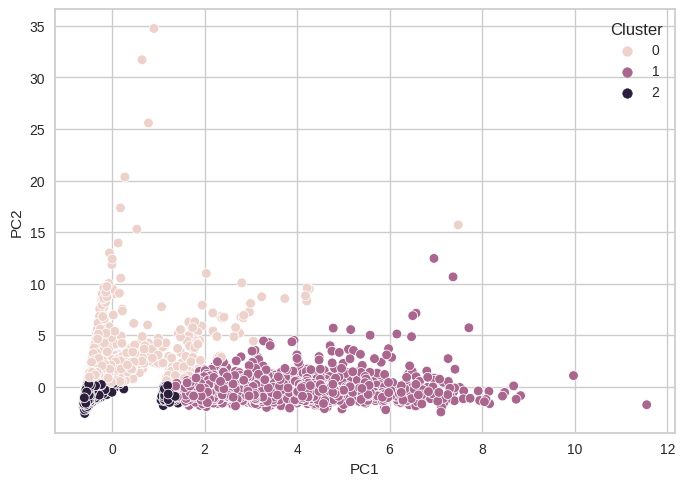

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
df_sub_pca = pca.fit_transform(df_sub_scaled.drop(['CustGender_F','CustGender_F'], axis = 1))

# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_sub_pca)

# Add the cluster labels to the PCA data
df_sub_pca = pd.DataFrame(df_sub_pca, columns=['PC1', 'PC2'])
df_sub_pca['Cluster'] = kmeans.labels_

# Switch back to original data
df_sub_clustered = pd.concat([df_sub.reset_index(drop=True), df_sub_pca], axis=1)

# Plot the clusters
import seaborn as sns
sns.scatterplot(data=df_sub_clustered, x='PC1', y='PC2', hue='Cluster')

#### k-Means

In [ ]:
# Idenfying no. of clusters using Elbow method
import random
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

k_means_viz = KMeans(init = 'k-means++', random_state = 42)

visualizer = KElbowVisualizer(k_means_viz, k=(1,11), timings=False)

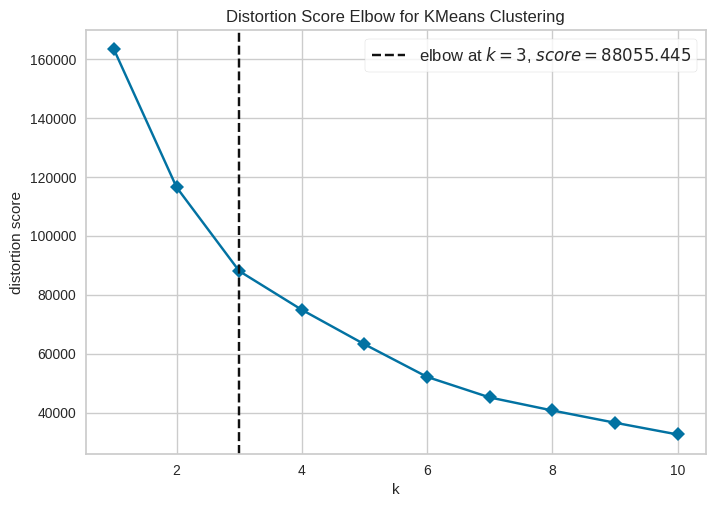

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer.fit(df_sub_scaled)
visualizer.show()

In [ ]:
# create the k-means model
k_means = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

# fit the model to the scaled data
k_means.fit(df_sub_scaled)

# get the cluster labels for each observation
labels_km = k_means.predict(df_sub_scaled)

# Add a column for the cluster labels
cluster_labels = pd.Series(labels_km, index=df_sub_scaled.index)

In [ ]:
# Copy dataframe for k-means clustering
df_sub_kmeans = df_sub.copy()

# Add the cluster labels to the original dataframe
df_sub_kmeans['Label'] = cluster_labels

df_sub_kmeans.head()

,Frequency,CustAccountBalance,Monetary,CustomerAge,Recency,CustGender_F,CustGender_M,Label
0,1,20935.30,200.00,23.00,1,1,0,1
1,1,3087857.54,1276.00,37.00,1,0,1,0
2,1,132279.82,3805.00,36.00,1,1,0,1
3,1,8.75,148.00,23.00,1,1,0,1
4,1,9142.87,100.00,23.00,1,0,1,0


In [ ]:
pca = PCA(n_components=2)
pca_kmeans = pca.fit_transform(df_sub_scaled)
pca_kmeans  = pd.DataFrame(data = pca_kmeans, columns=['PCA_1', 'PCA_2'])
pca_kmeans.head()

,PCA_1,PCA_2
0,2.34,-0.72
1,-1.15,-0.17
2,2.14,-0.45
3,2.34,-0.73
4,-0.80,-0.53


In [ ]:
pca_km_plot = pd.concat([pca_kmeans, pd.DataFrame({'cluster':cluster_labels})], axis = 1)
pca_km_plot.head()

,PCA_1,PCA_2,cluster
0,2.34,-0.72,1
1,-1.15,-0.17,0
2,2.14,-0.45,1
3,2.34,-0.73,1
4,-0.80,-0.53,0


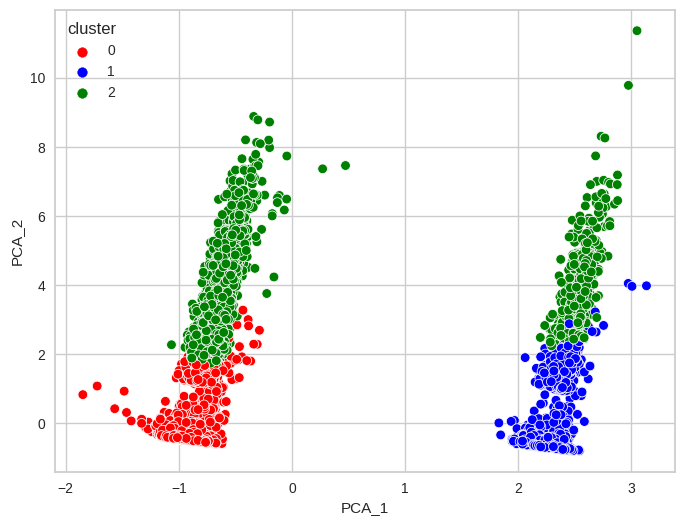

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x="PCA_1", y="PCA_2", hue="cluster", data=pca_km_plot,palette=['red','blue','green'])
plt.show()

In [ ]:
# Generate evaluation metrics 
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate the Silhouette coefficient
silhouette_coef = silhouette_score(df_sub_scaled, labels_km)

# Calculate the Calinski-Harabasz index
calinski_harabasz_index = calinski_harabasz_score(df_sub_scaled, labels_km)

print(f"Silhouette coefficient: {silhouette_coef}")
print(f"Calinski-Harabasz index: {calinski_harabasz_index}")

Silhouette coefficient: 0.48148923074046995
Calinski-Harabasz index: 9362.960871918584


Silhouette coefficient: -1 to 1, 1 indicates that the observation is well matched to its own cluster and poorly matched to other clusters. A score of -1 indicates that the observation is poorly matched to its own cluster and well matched to other clusters. A score of 0 indicates that the observation is equally matched to its own cluster and another cluster. The higher, the better.

Calinski-Harabasz index: A higher value indicates that the clusters are well separated and compact, and that the clustering model is appropriate for the data.

Note: Interpreting the values of the Silhouette coefficient and Calinski-Harabasz index can be subjective, as there is no hard and fast rule for what constitutes a "good" or "bad" score. Instead, these metrics should be used as a guide to compare different clustering models on the same dataset, or to compare the same clustering model with different parameter settings.

In [ ]:
# explore number of customers in each clusters
df_sub_kmeans.Label.value_counts()

0    16880
1     6441
Name: Label, dtype: int64

In [ ]:
# obtain the centroids in the scaled data
centroids_scaled = k_means.cluster_centers_

# Transform the centriods back into orginal data
centroids = scaler.inverse_transform(centroids_scaled)

# display the dataframe without scientific notation
pd.options.display.float_format = '{:.2f}'.format

centriods = pd.DataFrame(centroids, columns=df_sub.columns)
centriods.T

,0,1,2
Frequency,1.05,1.08,2.20
CustAccountBalance,82045.94,79016.59,82768.25
Monetary,1173.07,1506.70,3261.91
CustomerAge,29.24,28.39,29.16
Recency,1.63,3.24,131.94
CustGender_F,-0.00,1.00,0.23
CustGender_M,1.00,-0.00,0.77


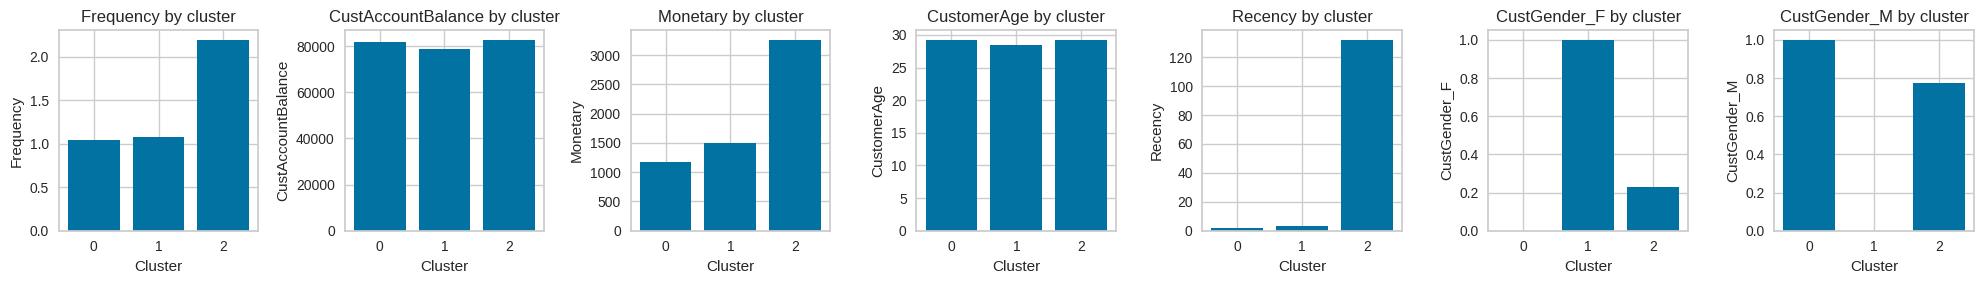

In [ ]:
# Define the number of columns for the subplot grid
num_cols = centriods.shape[1]

# Create a subplot grid with one row and num_cols columns
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(20, 3))

# Loop through each column and plot a bar chart in the corresponding subplot
for i, col in enumerate(centriods.columns):
    axes[i].bar(range(centriods.shape[0]), centriods[col])
    axes[i].set_xticks(range(centriods.shape[0]))
    axes[i].set_xticklabels(centriods.index)
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'{col} by cluster')
    
# Adjust the spacing between the subplots and display the plot
plt.tight_layout()
plt.show()

In [ ]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

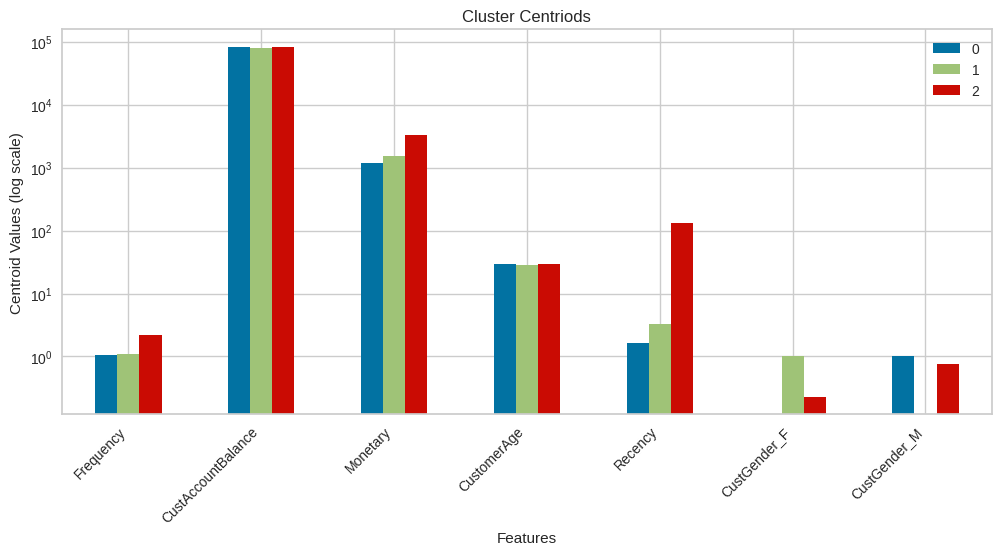

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# create a bar plot of the centroid values
# sns.set_style("whitegrid")
ax = centriods.T.plot(kind='bar', figsize=(12, 5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Centroid Values (log scale)')
plt.title('Cluster Centriods')
plt.yscale('log')  # set the y-axis to logarithmic scale
plt.show()

#### Hierarchical Clustering

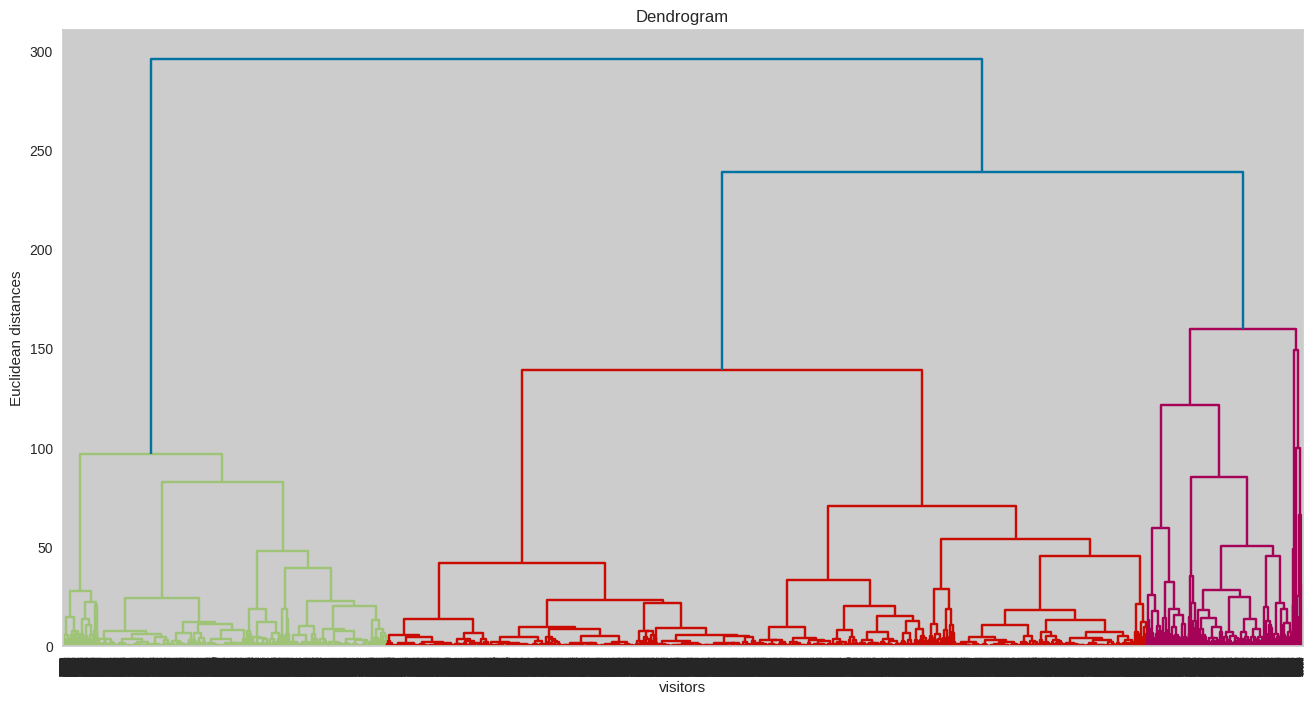

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(df_sub_scaled, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
HClustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='average')

HClustering = HClustering.fit_predict(df_sub_scaled)

df_sub_hc = df_sub.drop('Label', axis = 1)
df_sub_hc['Label'] = HClustering
df_sub_hc.head()

KeyError: ignored

In [ ]:
# 2 Generate Evaluation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate the Silhouette coefficient
silhouette_coef = silhouette_score(df_sub_scaled, HClustering)

# Calculate the Calinski-Harabasz index
calinski_harabasz_index = calinski_harabasz_score(df_sub_scaled, HClustering)

print(f"Silhouette coefficient: {silhouette_coef}")
print(f"Calinski-Harabasz index: {calinski_harabasz_index}")

Silhouette coefficient: 0.9397053954941793
Calinski-Harabasz index: 1105.1438565967894


In [ ]:
# 3 Generate Evaluation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate the Silhouette coefficient
silhouette_coef = silhouette_score(df_sub_scaled, HClustering)

# Calculate the Calinski-Harabasz index
calinski_harabasz_index = calinski_harabasz_score(df_sub_scaled, HClustering)

print(f"Silhouette coefficient: {silhouette_coef}")
print(f"Calinski-Harabasz index: {calinski_harabasz_index}")

Silhouette coefficient: 0.9225913853274799
Calinski-Harabasz index: 672.0548068093821


In [ ]:
# 4 Generate Evaluation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate the Silhouette coefficient
silhouette_coef = silhouette_score(df_sub_scaled, HClustering)

# Calculate the Calinski-Harabasz index
calinski_harabasz_index = calinski_harabasz_score(df_sub_scaled, HClustering)

print(f"Silhouette coefficient: {silhouette_coef}")
print(f"Calinski-Harabasz index: {calinski_harabasz_index}")

Silhouette coefficient: 0.8799909595245348
Calinski-Harabasz index: 614.5508906464079


In [ ]:
# explore number of customers in each clusters
df_sub_hc.Label.value_counts()

0    23318
1        3
Name: Label, dtype: int64

In [ ]:
df_sub_hc.columns

Index(['Frequency', 'CustAccountBalance', 'Monetary', 'CustomerAge', 'Recency',
       'CustGender_F', 'CustGender_M', 'Label'],
      dtype='object')

In [ ]:
for col in df_sub_hc.columns:
    plt.subplots(figsize = (12,4))
    sns.countplot(x='Label',hue=col, data = df_sub_hc)
    plt.show()

#### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Create DBSCAN object with specified hyperparameters
dbscan = DBSCAN(eps=1, min_samples=14)

# Fit DBSCAN to the scaled data
dbscan.fit(df_sub_scaled)

# Get the predicted cluster labels for each data point
labels_dbs = dbscan.labels_

df_sub_hc['Label'] = HClustering
df_sub_hc.head()

,Frequency,CustAccountBalance,Monetary,CustomerAge,Recency,CustGender_F,CustGender_M,Label
0,1,20935.30,200.00,23.00,1,1,0,0
1,1,3087857.54,1276.00,37.00,1,0,1,0
2,1,132279.82,3805.00,36.00,1,1,0,0
3,1,8.75,148.00,23.00,1,1,0,0
4,1,9142.87,100.00,23.00,1,0,1,0


In [ ]:
df_sub_hc.Label.value_counts()

0    23318
1        3
Name: Label, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate Silhouette Coefficient
silhouette_coefficient = silhouette_score(df_sub_scaled, labels)
print('Silhouette Coefficient:', silhouette_coefficient)

# Calculate Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(df_sub_scaled, labels)
print('Calinski-Harabasz Index:', calinski_harabasz_index)

Silhouette Coefficient: 0.4654333923346711
Calinski-Harabasz Index: 1202.8057320241596


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import RandomSearchCV
import numpy as np

# define the parameter grid
param_grid = {
    'eps': np.linspace(0.1, 2, num=20),
    'min_samples': np.arange(2, 10)
}

# create a DBSCAN object
dbscan = DBSCAN()

# create a GridSearchCV object
grid_search = RandomSearchCV(dbscan, param_grid, cv=5, scoring='silhouette')

# fit the grid search object to the data
grid_search.fit(X_scaled)

# print the best parameters and the corresponding silhouette score
print("Best parameters: ", grid_search.best_params_)
print("Best silhouette score: ", grid_search.best_score_)
